In [120]:
from neural_astar_jax.planner import differentiable_astar, astar
from importlib import reload
import jax.numpy as jnp
import matplotlib.pyplot as plt
reload(differentiable_astar)
from chex import Array
from typing import NamedTuple

from functools import partial
import jax


In [117]:
map_designs = jnp.ones((1, 64, 64, 1))
map_designs = map_designs.at[:, 10:20, 10:20].set(0).at[:, 30:40, 30:40].set(0).at[:, 10:20, 30:40].set(0).at[:, 30:40, 10:20].set(0)
start_maps = jnp.zeros((1, 64, 64, 1)).at[:, 1, 1].set(1)
goal_maps = jnp.zeros((1, 64, 64, 1)).at[:, 62, 62].set(1)

In [122]:
model = astar.NeuralAstar()
variables = model.init(jax.random.PRNGKey(0), jnp.ones((1, 64, 64, 1)), jnp.ones((1, 64, 64, 1)), jnp.ones((1, 64, 64, 1)))
model_apply = jax.jit(model.apply)
%timeit model_apply(variables, map_designs, start_maps, goal_maps)

28.7 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
obstacles_map = jnp.ones((64, 64))
obstacles_map = obstacles_map.at[10:20, 10:20].set(0).at[30:40, 30:40].set(0).at[10:20, 30:40].set(0).at[30:40, 10:20].set(0)
start_map = jnp.zeros((64, 64)).at[1, 1].set(1)
goal_map = jnp.zeros((64, 64)).at[62, 62].set(1)
cost_map = obstacles_map

da = differentiable_astar.DifferentiableAstar()
%timeit da(cost_map, start_map, goal_map, obstacles_map)

6.87 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


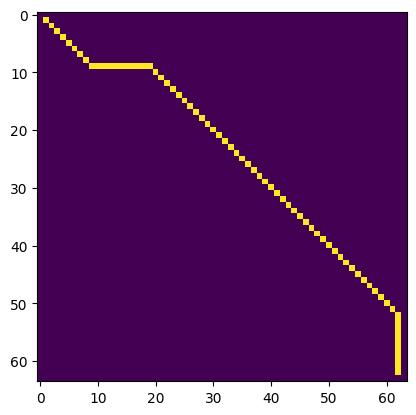

In [3]:
output = da(cost_map, start_map, goal_map, obstacles_map)
plt.imshow(output.path_map)

In [123]:
from neural_astar.planner import VanillaAstar, NeuralAstar
import torch

na = NeuralAstar()

map_designs_t = torch.tensor(map_designs.to_py()).permute(0, 3, 1, 2)
start_maps_t = torch.tensor(start_maps.to_py()).permute(0, 3, 1, 2)
goal_maps_t = torch.tensor(goal_maps.to_py()).permute(0, 3, 1, 2)

%timeit na.forward(map_designs_t, start_maps_t, goal_maps_t)

166 ms ± 765 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
